In [1]:
import numpy as np
from tqdm import tqdm
from imageio import imread
from scipy import misc, ndimage
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Single Scale Template Matching (Week11 Lab Exercise Submission)

### Load template and apply necessary preprocessing

(108, 81)


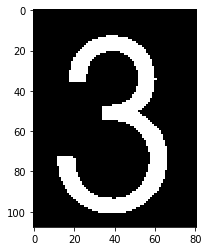

[0. 1.]


In [2]:
template = imread('./W11LabData/template.png', pilmode='L')
template = 255 -  template
template[template < 128] = 0
template[127 < template] = 255
template = template/255
print(template.shape)
plt.imshow(255*template, cmap='gray')
plt.show()
print(np.unique(template))

### Load input image and apply necessary preprocessing

(1053, 745)


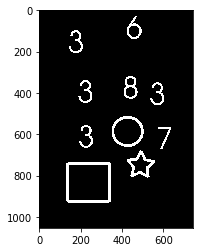

[0. 1.]


In [3]:
input_img = imread('./W11LabData/input.png', pilmode='L')
input_img[input_img < 128] = 0
input_img[127 < input_img] = 255
input_img = 255 - input_img
input_img = input_img/255
print(input_img.shape)
plt.imshow(255*input_img, cmap='gray')
plt.show()
print(np.unique(input_img))

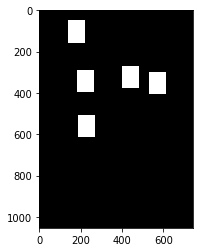

In [4]:
# ToDo: Complete your code here
# Please include your full name and unikey in your final image to be submitted
input_height = input_img.shape[0]
input_width = input_img.shape[1]
temp_height = template.shape[0]
temp_width = template.shape[1]

block = np.zeros([temp_height, temp_width], np.uint8)
output_img = np.zeros([input_height, input_width], np.uint8)

for y in range(0,input_height,5):
    for x in range(0,input_width,2):
        if y+temp_height > input_height or x+temp_width > input_width:
            pass
        else:
            for i in range(temp_height):
                for j in range(temp_width):
                    block[i][j] = input_img[y+i][x+j]
            ssd = np.sum(  (template-block) ** 2 )
            if ssd < 1500:
                for i in range(temp_height):
                    for j in range(temp_width):
                        output_img[y+i][x+j] = 255
        

plt.imshow(output_img, cmap='gray')

In [8]:
def generate_results(wk, name, SID, raw_img, output_imgs, channel):
    img_size = raw_img.shape
    x = img_size[0]
    y = img_size[1]
    
    # resize input image to a suitable size
    while x > 10:
        x /= (x / 10)
        y /= (y / 10)

    # Generate one axes each for the original image and all output images
    fig, axs = plt.subplots(1, len(output_imgs)+1, figsize=(x,y))
    
    # Plot the original image
    if channel == 1:
        axs[0].imshow(raw_img, cmap='gray')
    elif channel == 3:
        axs[0].imshow(raw_img)
    axs[0].text(0.5,-0.1, 'Original Image', size=12, ha="center", transform=axs[0].transAxes)
    axs[0].axis('off')
    
    # Plot each output image
    tasks = list(output_imgs.keys())
    for i in range(1,len(tasks)+1):
        if channel == 1:
            axs[i].imshow(output_imgs[tasks[i-1]], cmap='gray')
        elif channel == 3:
            axs[i].imshow(output_imgs[tasks[i-1]])
        axs[i].text(0.5,-0.1, tasks[i-1], size=12, ha="center", transform=axs[i].transAxes)
        axs[i].axis('off')

    fig.suptitle("Week %i Lab Exercise\n %s SID:%i"%(wk, name, SID),x=0.5,y=1)
    plt.tight_layout()
    plt.show()

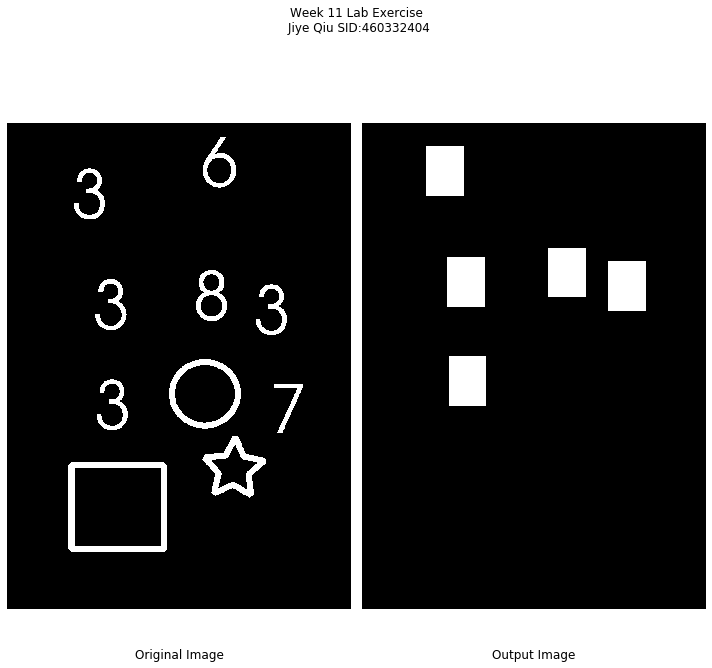

In [11]:
output_imgs = {'Output Image': output_img}
generate_results(11, 'Jiye Qiu', 460332404, 255*input_img, output_imgs,1)

# Extension: Multi-scale Template Matching

(1053, 745)


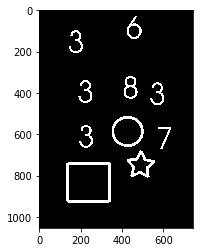

[  0 255]


In [9]:
input2 = imread('./W11LabData/input.png', mode='L')
input2[input2 < 128] = 0
input2[127 < input2] = 255
input2 = 255 - input2
print(input2.shape)
plt.imshow(input2, cmap='gray')
plt.show()
print(np.unique(input2))

In [10]:
# ToDo: Complete your code here

# Advanced Extension: Feature-based Template Matching

(1053, 745)


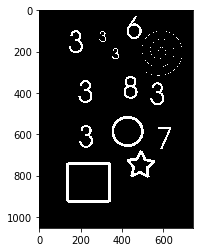

[  0 255]


In [11]:
input3 = imread('./W11LabData/input_feature_based_matching.png', mode='L')
input3[input3 < 128] = 0
input3[127 < input3] = 255
input3 = 255 - input3
print(input3.shape)
plt.imshow(input3, cmap='gray')
plt.show()
print(np.unique(input3))

In [12]:
# ToDo: Complete your code here